In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
#from colossus.cosmology import cosmology as cc

import matplotlib.pyplot as plt

In [6]:
from galCIB import get_hod_model


Mh = np.logspace(10, 15, 50)
z = np.ones_like(Mh) * 1.0
theta = [12.0, -0.02, 0.5]  # Example theta_cen

model = get_hod_model("Zheng05",z)
print(model.ncen(Mh, theta))


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.55111512e-17
 1.05471187e-14 1.48414614e-12 1.35382372e-10 8.01798555e-09
 3.08954852e-07 7.76712747e-06 1.27884798e-04 1.38645357e-03
 9.97488293e-03 4.81831784e-02 1.59098451e-01 3.69337149e-01
 6.29659323e-01 8.40256300e-01 9.51550060e-01 9.89954206e-01
 9.98601426e-01 9.99870783e-01 9.99992139e-01 9.99999687e-01
 9.99999992e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


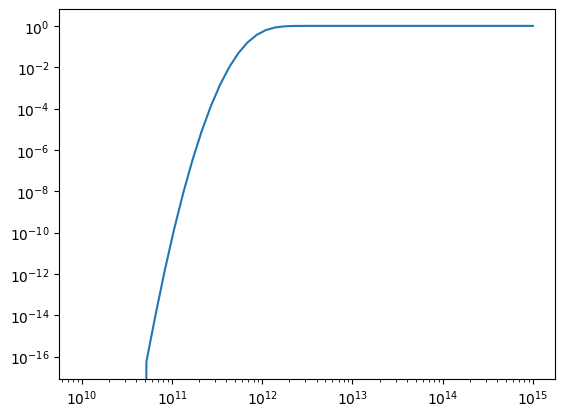

In [7]:
plt.loglog(Mh, model.ncen(Mh, theta))

Test Pk between colossus and camb

In [3]:
from galCIB import Cosmology
from galCIB import Survey
from galCIB import get_hod_model

import numpy as np

In [4]:
zs = np.linspace(0.5, 1.5, 20)

sigma = 0.79
mu = 0.4
pz = np.sqrt(2/np.pi)/sigma * np.exp(-0.5 * ((zs - mu)/sigma)**2)

# pz renorm such that integral p(z) dz = 1
pz = pz/(pz.sum() * np.diff(zs)[0])

ks = np.logspace(-3,1,500)
Mh = np.logspace(7,15,100)

In [5]:
cosmo = Cosmology(zs,ks,Mh,use_little_h=True)

In [7]:
cosmo.cosmo.Ode(cosmo.z)

array([0.39604142, 0.37157621, 0.34853489, 0.32689033, 0.30660137,
       0.28761656, 0.26987729, 0.25332045, 0.2378805 , 0.22349112,
       0.21008655, 0.19760252, 0.18597696, 0.17515045, 0.16506658,
       0.15567209, 0.14691696, 0.13875441, 0.13114079, 0.12403555])

In [47]:
DESI = Survey(zs, pz, 1.5, "DESI")

In [58]:
DESI.compute_windows(cosmo)

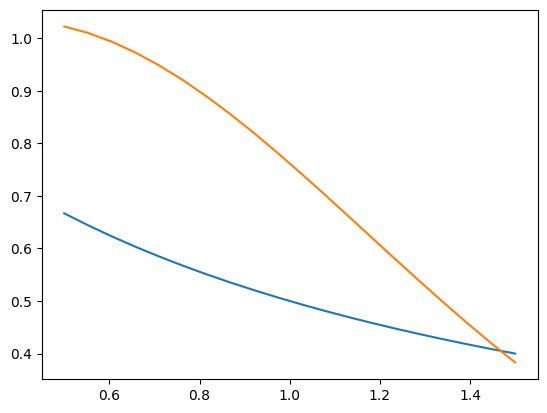

In [61]:
plt.plot(DESI.z, DESI.Wg)
plt.plot(DESI.z, DESI.Wcib)

In [18]:
tst.get_pk_grid().shape

(500, 20)

In [43]:
tst.cosmo.comovingDistance(0,0.5, transverse=True)/tst.cosmo.h

1946.386874732119

In [44]:
from astropy.cosmology import Planck18 as planck

In [45]:
planck.comoving_distance(0.5)

<Quantity 1946.41663479 Mpc>

In [49]:
tst.cosmo.H0

67.66

In [48]:
planck.H(zs)

<Quantity [ 89.22719344,  92.11752752,  95.11342383,  98.21157428,
           101.40875928, 104.70186558, 108.08789867, 111.56399062,
           115.12740422, 118.77553438, 122.50590717, 126.31617726,
           130.20412409, 134.16764725, 138.20476119, 142.31358965,
           146.49235995, 150.73939714, 155.05311836, 159.43202724] km / (Mpc s)>

In [50]:
tst.cosmo.Om0

0.3111

- 1: Specify cosmology
- 2: Specify survey